# K-nearest neighbours model 

We decided to pick k nearest neighbours (KNN) for one of our models as it is a classification model and works best with fewer features which means that we can explore the relationship between 2 features more in depth (How does that sound)

List of things to do:<br>
    -hyperparameter tuning!!!!<br>
    -ROC curves

## /////////////////////////////////////////////

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

<br />



# 1.0 Loading data and setting up the model


<br>

## 1.1 collecting data and getting features/labels

We must first start off by scaling the features, a __ scaler is required since KNN requires the calculation of euclidian distance which could heavily skew the result if unaltered.

In [2]:
dfWDBC = pd.read_csv("Data Exploration/wdbc.csv")

#split into test and features
features = dfWDBC[["Symmetry","FractalDimension"]]
label = dfWDBC["B/M"]

#Need to encode B/M before proceeding
le = preprocessing.LabelEncoder()
label = le.fit_transform(label)
label = pd.DataFrame(data = label, columns = ["B/M"])


#Need to encode the features
ss = StandardScaler()
features = ss.fit_transform(features)

<br />


##  1.2 Splitting the data using stratified sampling

The data is split into training and test data with a 4:1 split respectively. This split is also stratified so there is a representive ammount of benign and malignant tumors in both the test and training data

In [32]:
#All nice and stratified :)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, stratify = label["B/M"].values, random_state= 1)
#Simples

</br>

#  2 Establishing Model and Model Evaluation

<br>

## 2.2 Fitting the model

In [16]:
k = 40
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=40)

<br>

## 2.3 Testing the Accuracy

In [30]:
print("Test Size = " + str(len(y_test)))
#Testing Accuracy
y_pred = model.predict(x_test)
print("Accuracy Score = " + str(metrics.accuracy_score(y_test,y_pred)))

#Testing errors using accuracy matrix (Thanks Nicky)
c = confusion_matrix(y_test, y_pred)
print(f'True negatives: {c[0][0]}')
print(f'False negatives: {c[1][0]}')
print(f'True positives: {c[1][1]}')
print(f'False positives: {c[0][1]}')
print("\n\n\n")

print(classification_report(y_test, y_pred))

Test Size = 114
Accuracy Score = 0.6578947368421053
True negatives: 61
False negatives: 28
True positives: 14
False positives: 11




              precision    recall  f1-score   support

           0       0.69      0.85      0.76        72
           1       0.56      0.33      0.42        42

    accuracy                           0.66       114
   macro avg       0.62      0.59      0.59       114
weighted avg       0.64      0.66      0.63       114



We need to be extremely careful with the accuracy of this model since the consequences of classifying a malignant tumor as benign could have a fatal affect on the patient. with KNN we achieve a false negative rate of ___ which is equivalent to __ %

## 2.4 visualising model

<IPython.core.display.Javascript object>


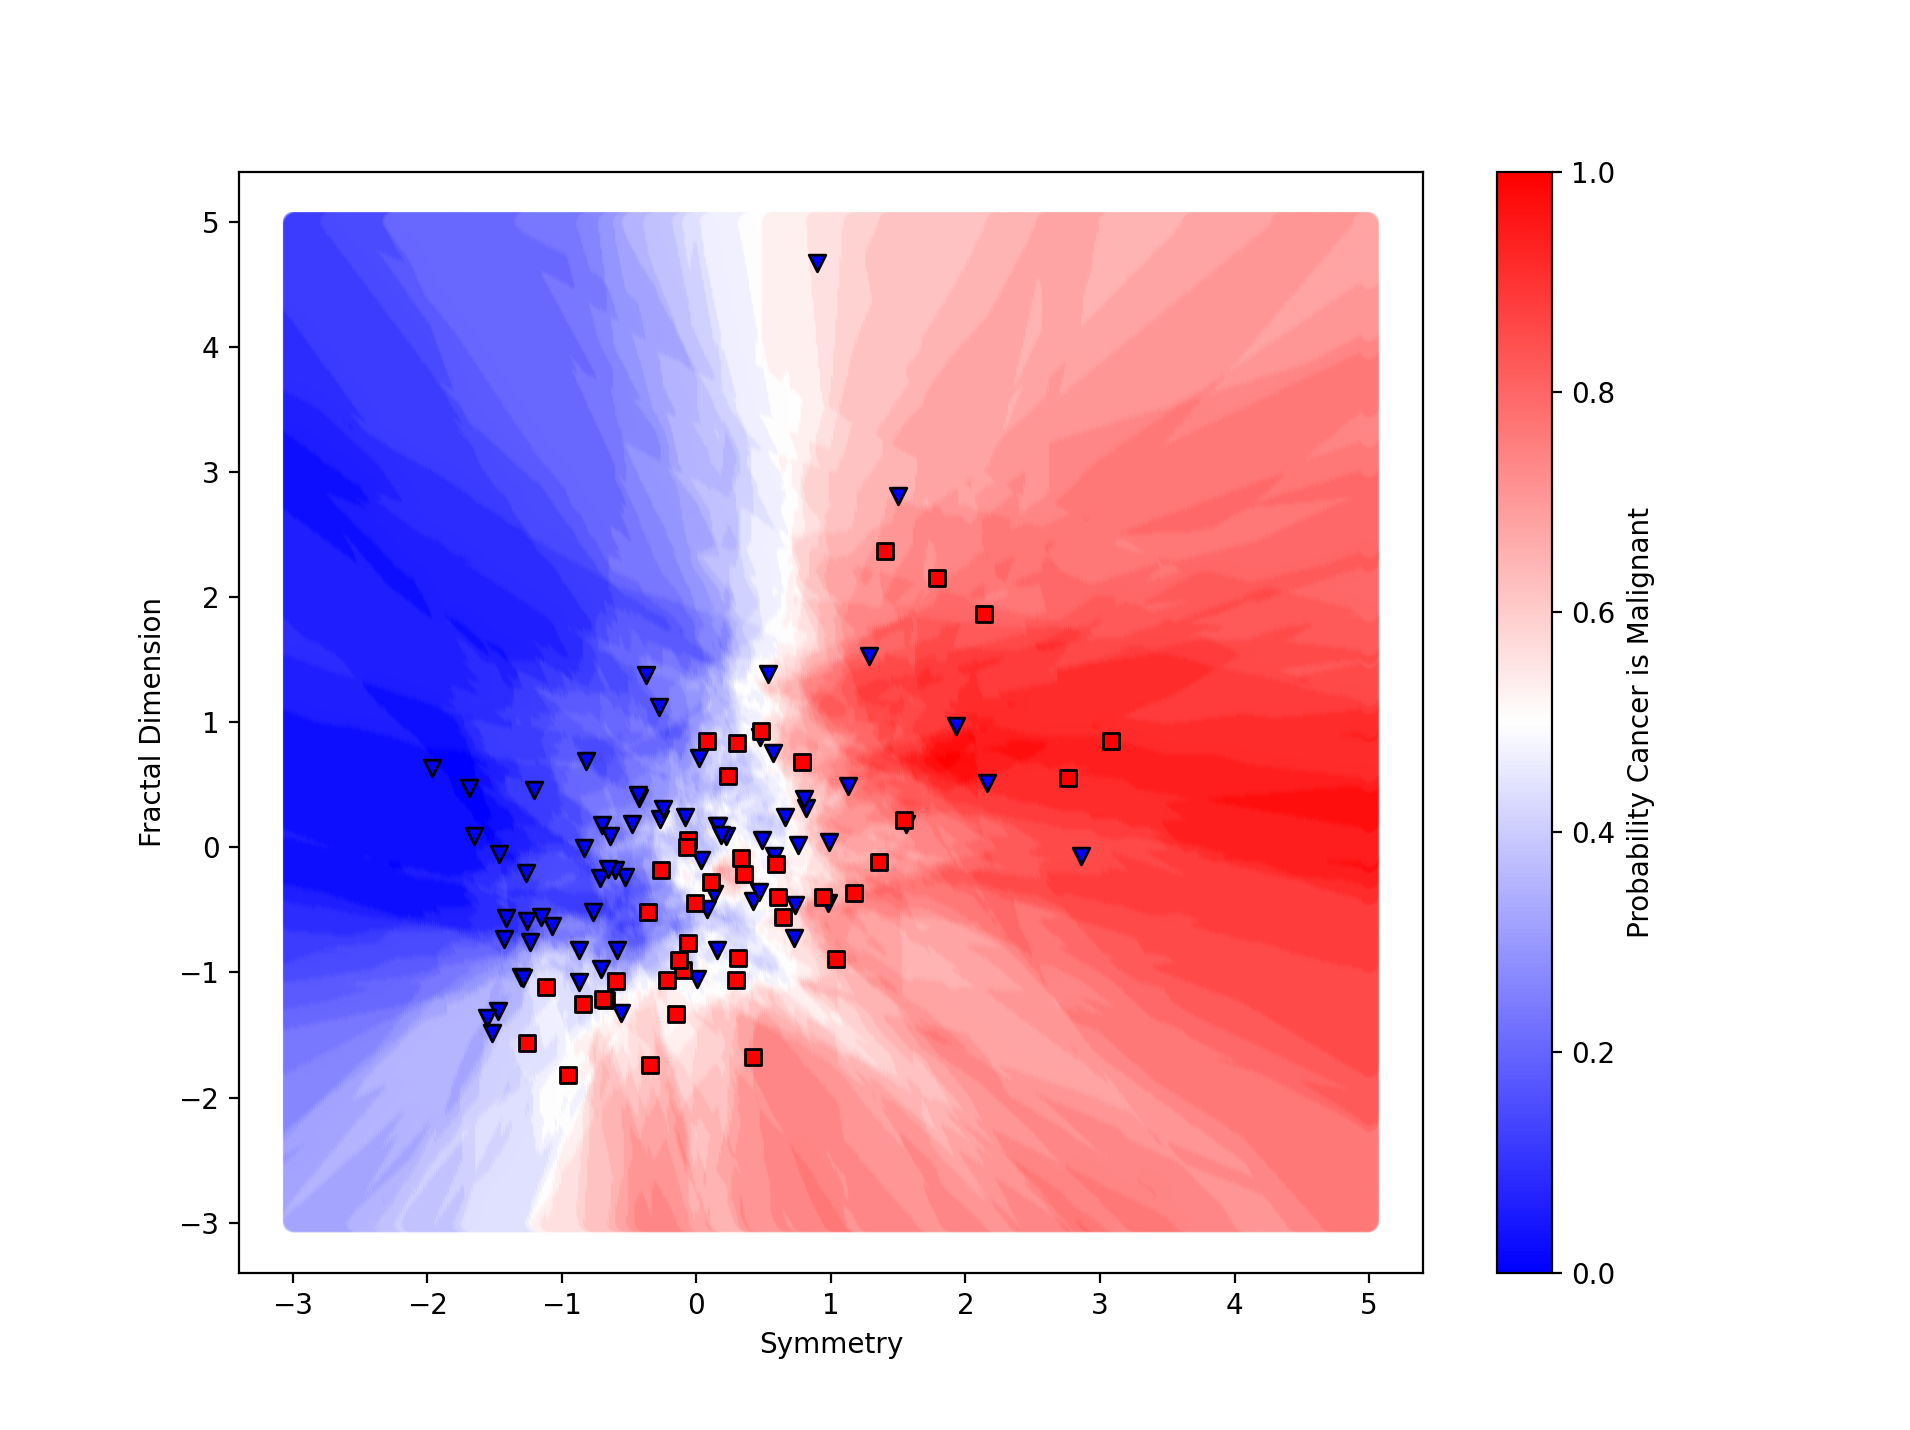

In [31]:
%matplotlib notebook
xs = np.linspace(-3,5,500)
ys = np.linspace(-3,5,500)
xv,yv = np.meshgrid(xs,ys)
prob = []
for x in xs:
    for y in ys:
        prob.append(model.predict_proba([[x,y]])[0][1])
plt.scatter(yv,xv, c = prob, cmap="bwr",alpha = 0.5)

xM = []
yM = []
xB = []
yB = []
z = y_test["B/M"].tolist()

for i in range(len(z)):
    if z[i] == 1:
        xM.append(x_test[i][0])
        yM.append(x_test[i][1])
    else:
        xB.append(x_test[i][0])
        yB.append(x_test[i][1])

plt.scatter(xB,yB,linewidths=1, edgecolors= "black", color = "blue",marker = "v")
plt.scatter(xM,yM,linewidths=1, edgecolors= "black", color = "red", marker = "s")
colormap = plt.cm.get_cmap("bwr")
sm = plt.cm.ScalarMappable(cmap=colormap)
cb = plt.colorbar(sm)
cb.ax.set_ylabel('Probability Cancer is Malignant')
plt.xlabel("Symmetry")
plt.ylabel("Fractal Dimension")
plt.show()


<br>

## 2.5 Learning Curves

<IPython.core.display.Javascript object>


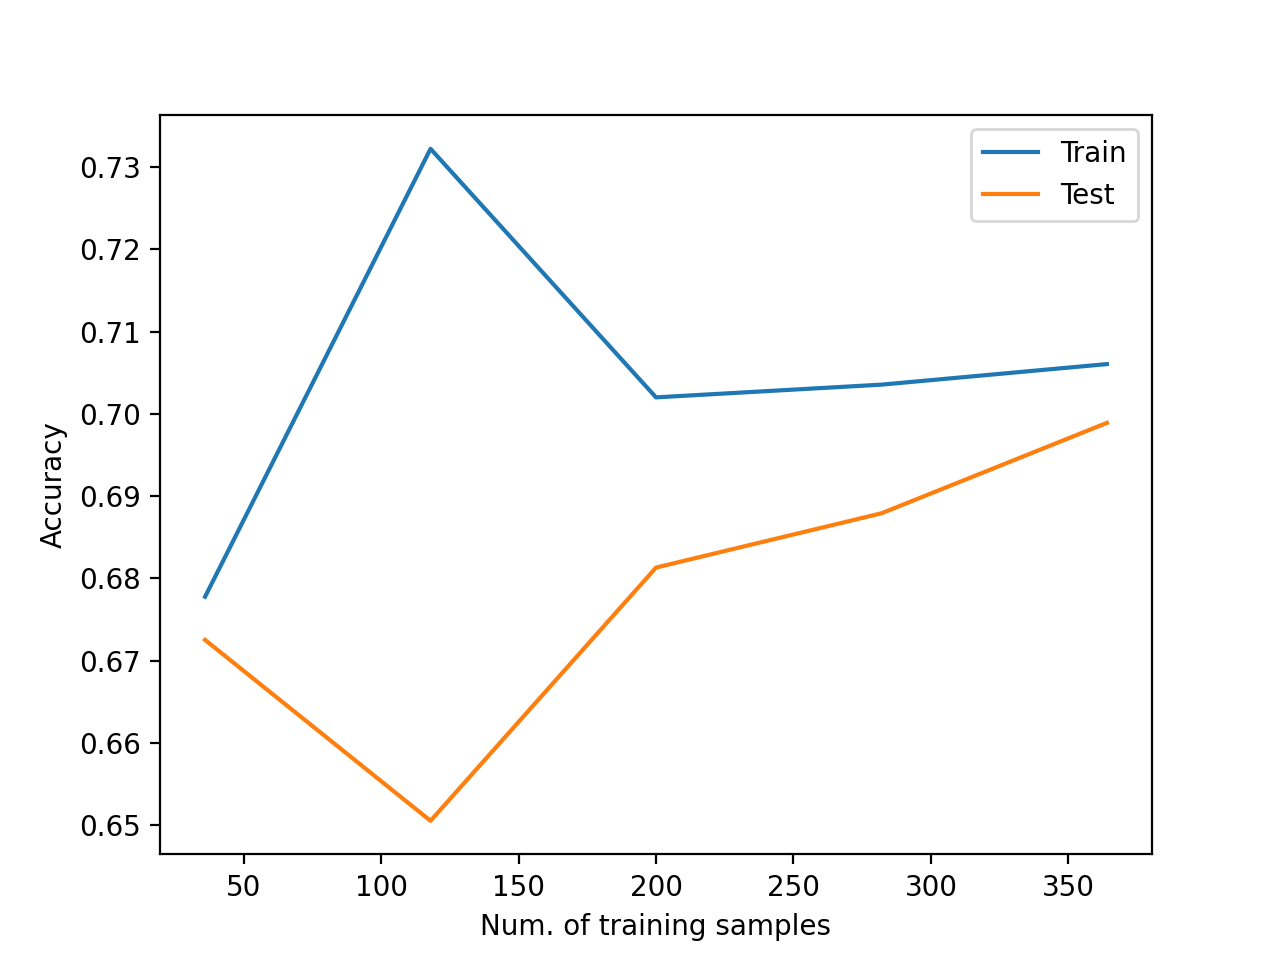

In [25]:
%matplotlib notebook
train_sizes_abs, train_scores, test_scores = learning_curve(estimator=LogisticRegression(), X=x_train, y=y_train)

# Array of tuples (train_size, train_score)
train_avg, test_avg = [], []

for i in range(len(train_sizes_abs)):
    train_avg.append(np.average(train_scores[i]))
    test_avg.append(np.average(test_scores[i]))

plt.plot(train_sizes_abs, train_avg)
plt.plot(train_sizes_abs, test_avg)
plt.legend(['Train', 'Test'])
plt.xlabel('Num. of training samples')
plt.ylabel('Accuracy')
plt.show()

Need to research into learning curves fully to finish write up

## 2.6 Hyperparameter Tuning